In [1]:
import os
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATAPATH = "./data/mnist"
PROCESSED_PATH = os.path.join(DATAPATH, "processed")

TRAIN_IMAGES_PATH = "train-images-idx3-ubyte.gz"
TRAIN_LABELS_PATH = "train-labels-idx1-ubyte.gz"
TEST_IMAGES_PATH = "t10k-images-idx3-ubyte.gz"
TEST_LABELS_PATH = "t10k-labels-idx1-ubyte.gz"

IMAGE_SIZE = 28
TRAIN_SIZE = 60000
TEST_SIZE = 10000

In [3]:
def read_images(fp, n_samples, image_size=IMAGE_SIZE):
    with gzip.open(fp, "r") as f:
        f.read(16) # skip first 4 bytes according to http://yann.lecun.com/exdb/mnist/
        buf = f.read(image_size * image_size * n_samples)
        data = np.reshape(np.frombuffer(buf, dtype=np.uint8), (n_samples, image_size, image_size)).astype(np.uint8)
        return data

def read_labels(fp, n_samples):
    with gzip.open(fp, "r") as f:
        f.read(8) # skip first 2 bytes according to http://yann.lecun.com/exdb/mnist/
        buf = f.read(n_samples)
        data = np.reshape(np.frombuffer(buf, dtype=np.uint8), (n_samples, 1)).astype(np.uint8)
        return data
    
def to_sprite(image_arr, image_size=IMAGE_SIZE):
    sprite_arr = np.reshape(image_arr, (-1, image_size * image_size))
    sprite_img = Image.fromarray(sprite_arr, mode="L")
    return sprite_img

In [4]:
X_train = read_images(fp=os.path.join(DATAPATH, TRAIN_IMAGES_PATH), n_samples=TRAIN_SIZE, image_size=IMAGE_SIZE)
y_train = read_labels(fp=os.path.join(DATAPATH, TRAIN_LABELS_PATH), n_samples=TRAIN_SIZE)
X_test = read_images(fp=os.path.join(DATAPATH, TEST_IMAGES_PATH), n_samples=TEST_SIZE, image_size=IMAGE_SIZE)
y_test = read_labels(fp=os.path.join(DATAPATH, TEST_LABELS_PATH), n_samples=TEST_SIZE)

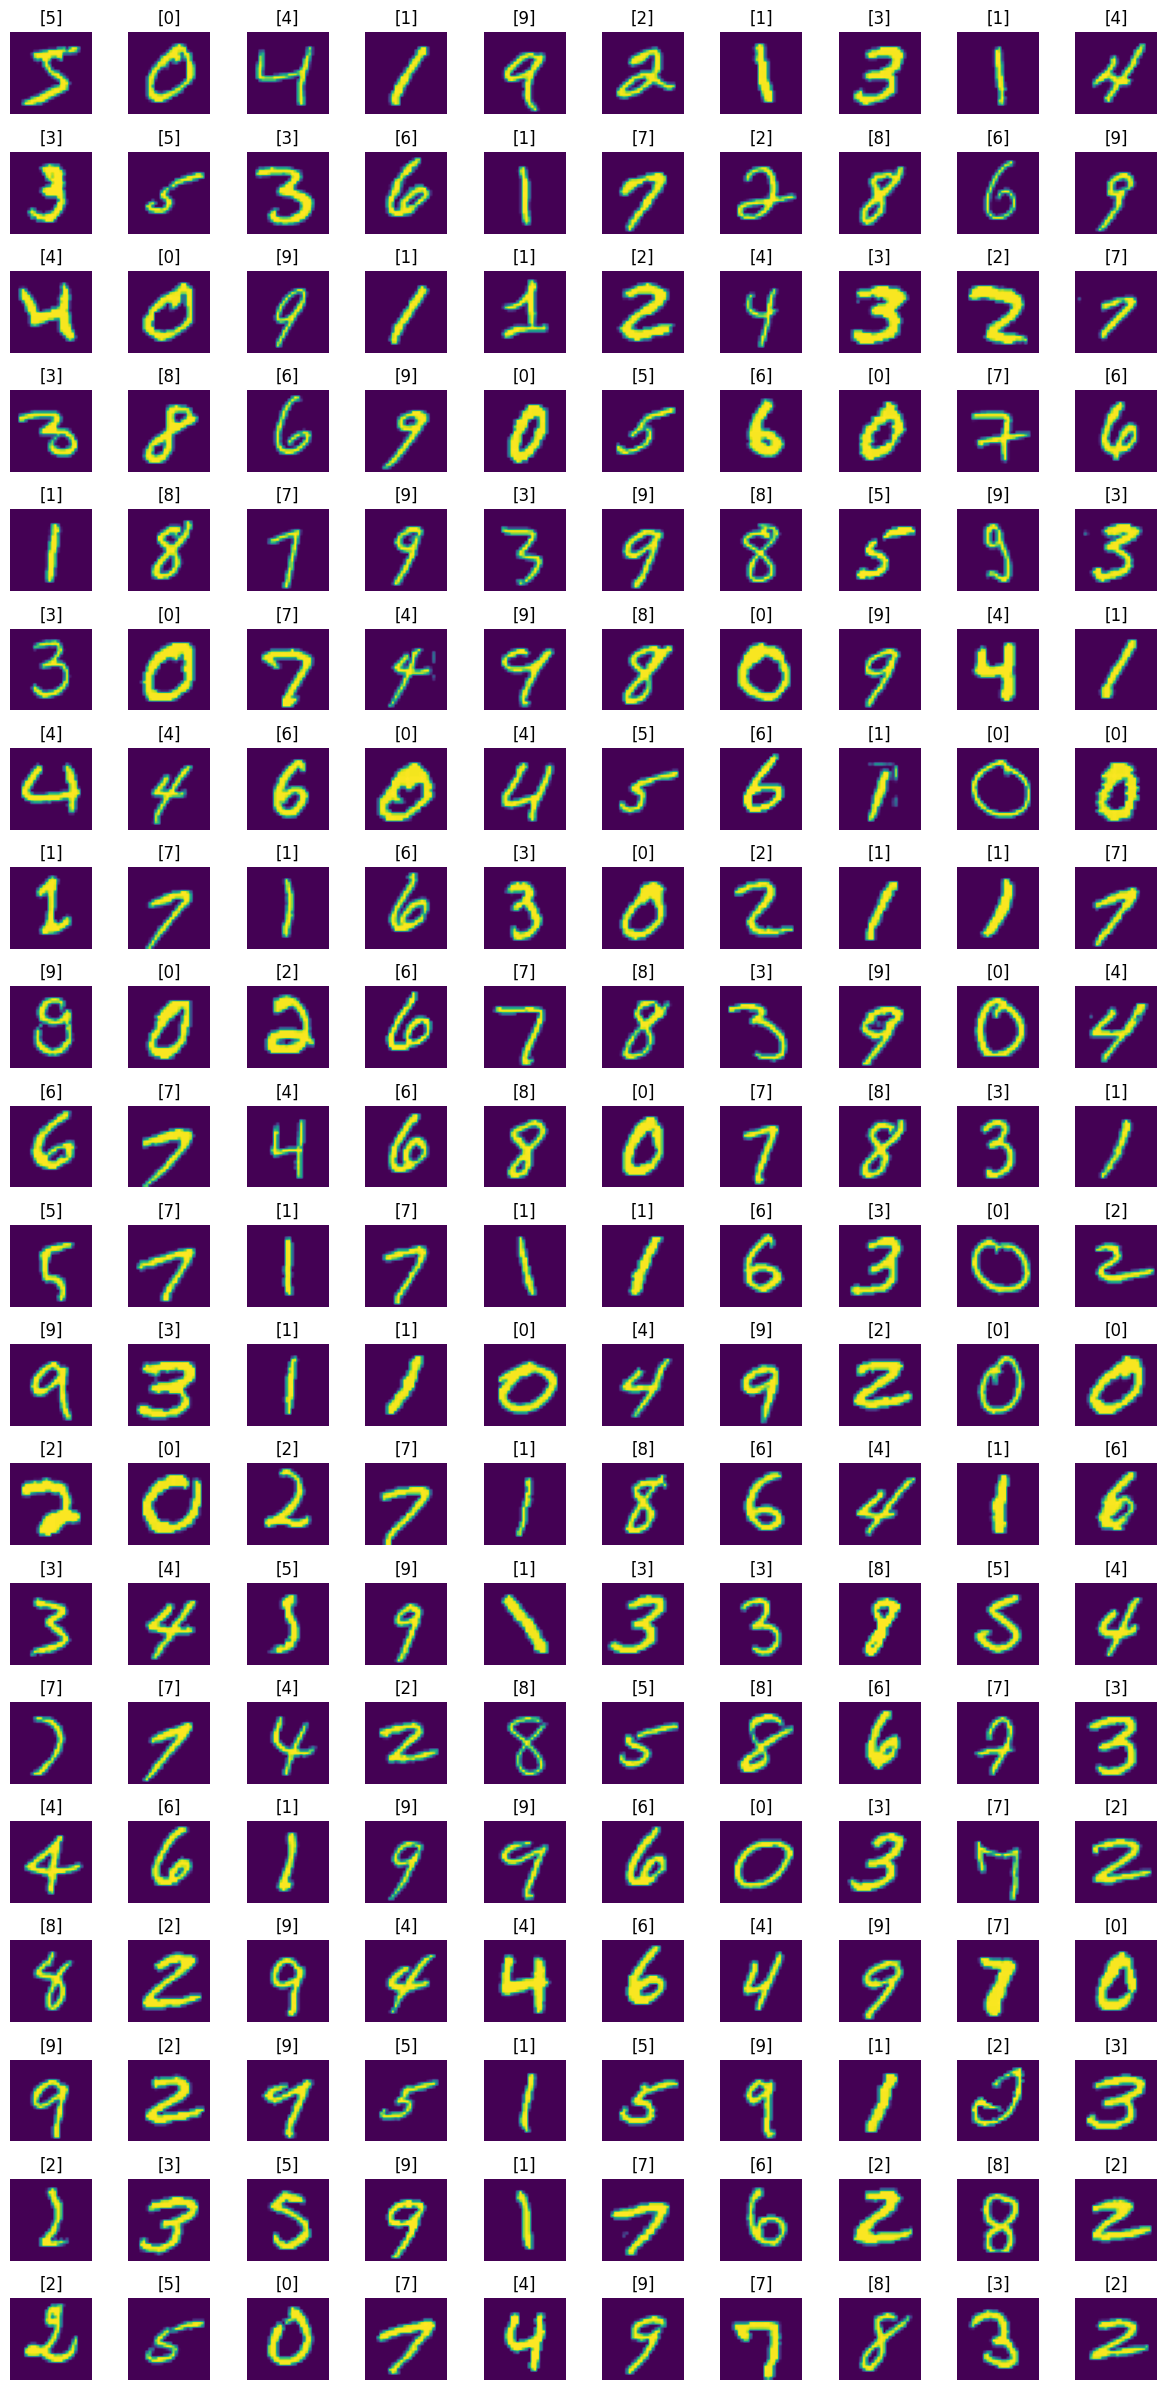

In [5]:
# Manually verify train data read
fig, axes = plt.subplots(ncols=10, nrows=20, figsize=(12, 24))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
    ax.axis("off")
plt.tight_layout()
plt.show()

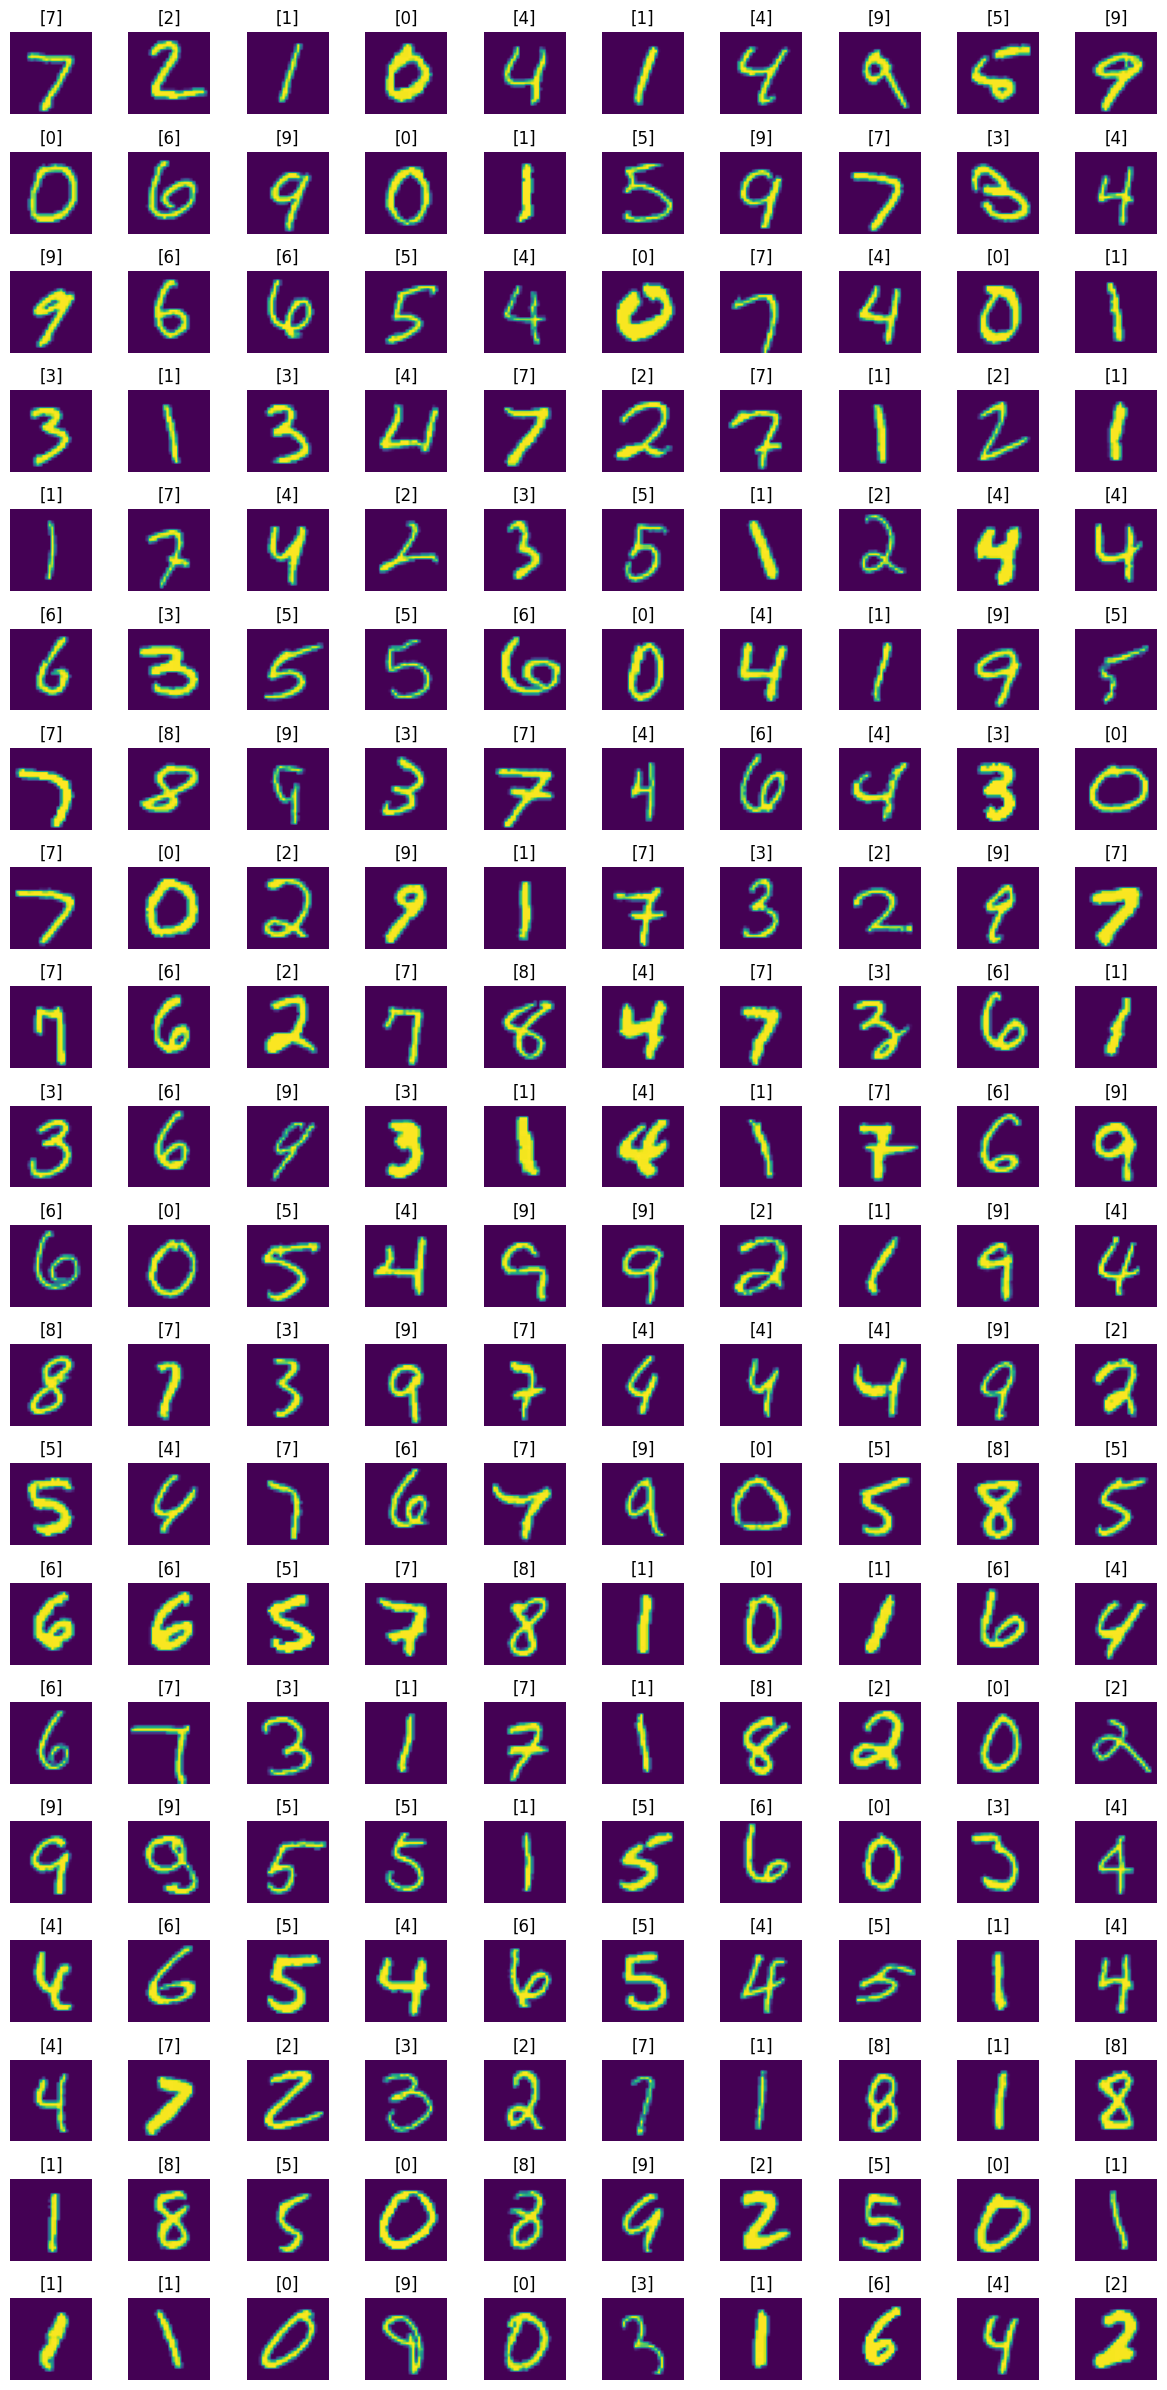

In [6]:
# Manually verify test data read
fig, axes = plt.subplots(ncols=10, nrows=20, figsize=(12, 24))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(y_test[i])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [7]:
X_train_sprite = to_sprite(image_arr=X_train, image_size=IMAGE_SIZE)
X_test_sprite = to_sprite(image_arr=X_test, image_size=IMAGE_SIZE)

In [8]:
os.makedirs(PROCESSED_PATH, exist_ok=True)
X_train_sprite.save(os.path.join(PROCESSED_PATH, "mnist_images_train.png"))
X_test_sprite.save(os.path.join(PROCESSED_PATH, "mnist_images_test.png"))
y_train.astype(np.uint8).tofile(os.path.join(PROCESSED_PATH, "mnist_labels_train_uint8.dat"))
y_test.astype(np.uint8).tofile(os.path.join(PROCESSED_PATH, "mnist_labels_test_uint8.dat"))

In [10]:
np.array(Image.open(os.path.join(PROCESSED_PATH, "mnist_images_train.png"))).shape

(60000, 784)